# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

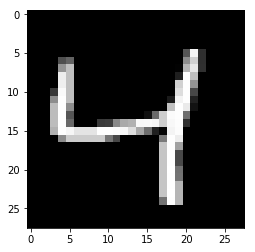

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [19]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 16 # feel free to change this value

img_shape = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, img_shape))
targets_ = tf.placeholder(tf.float32, (None, img_shape))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, img_shape)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [20]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6822
Epoch: 1/20... Training loss: 0.6792
Epoch: 1/20... Training loss: 0.6748
Epoch: 1/20... Training loss: 0.6700
Epoch: 1/20... Training loss: 0.6645
Epoch: 1/20... Training loss: 0.6580
Epoch: 1/20... Training loss: 0.6508
Epoch: 1/20... Training loss: 0.6444
Epoch: 1/20... Training loss: 0.6345
Epoch: 1/20... Training loss: 0.6247
Epoch: 1/20... Training loss: 0.6154
Epoch: 1/20... Training loss: 0.6025
Epoch: 1/20... Training loss: 0.5904
Epoch: 1/20... Training loss: 0.5826
Epoch: 1/20... Training loss: 0.5675
Epoch: 1/20... Training loss: 0.5528
Epoch: 1/20... Training loss: 0.5380
Epoch: 1/20... Training loss: 0.5282
Epoch: 1/20... Training loss: 0.5118
Epoch: 1/20... Training loss: 0.4982
Epoch: 1/20... Training loss: 0.4846
Epoch: 1/20... Training loss: 0.4751
Epoch: 1/20... Training loss: 0.4588
E

Epoch: 2/20... Training loss: 0.1920
Epoch: 2/20... Training loss: 0.1996
Epoch: 2/20... Training loss: 0.1934
Epoch: 2/20... Training loss: 0.1873
Epoch: 2/20... Training loss: 0.1898
Epoch: 2/20... Training loss: 0.1969
Epoch: 2/20... Training loss: 0.1960
Epoch: 2/20... Training loss: 0.2018
Epoch: 2/20... Training loss: 0.1938
Epoch: 2/20... Training loss: 0.1966
Epoch: 2/20... Training loss: 0.1964
Epoch: 2/20... Training loss: 0.1990
Epoch: 2/20... Training loss: 0.1938
Epoch: 2/20... Training loss: 0.1990
Epoch: 2/20... Training loss: 0.1909
Epoch: 2/20... Training loss: 0.1927
Epoch: 2/20... Training loss: 0.1964
Epoch: 2/20... Training loss: 0.1972
Epoch: 2/20... Training loss: 0.1941
Epoch: 2/20... Training loss: 0.1954
Epoch: 2/20... Training loss: 0.1933
Epoch: 2/20... Training loss: 0.1978
Epoch: 2/20... Training loss: 0.1946
Epoch: 2/20... Training loss: 0.1964
Epoch: 2/20... Training loss: 0.1925
Epoch: 2/20... Training loss: 0.1981
Epoch: 2/20... Training loss: 0.1965
E

Epoch: 3/20... Training loss: 0.1604
Epoch: 3/20... Training loss: 0.1630
Epoch: 3/20... Training loss: 0.1589
Epoch: 3/20... Training loss: 0.1607
Epoch: 3/20... Training loss: 0.1628
Epoch: 3/20... Training loss: 0.1686
Epoch: 3/20... Training loss: 0.1649
Epoch: 3/20... Training loss: 0.1566
Epoch: 3/20... Training loss: 0.1573
Epoch: 3/20... Training loss: 0.1637
Epoch: 3/20... Training loss: 0.1580
Epoch: 3/20... Training loss: 0.1631
Epoch: 3/20... Training loss: 0.1646
Epoch: 3/20... Training loss: 0.1634
Epoch: 3/20... Training loss: 0.1648
Epoch: 3/20... Training loss: 0.1647
Epoch: 3/20... Training loss: 0.1611
Epoch: 3/20... Training loss: 0.1658
Epoch: 3/20... Training loss: 0.1621
Epoch: 3/20... Training loss: 0.1625
Epoch: 3/20... Training loss: 0.1646
Epoch: 3/20... Training loss: 0.1635
Epoch: 3/20... Training loss: 0.1579
Epoch: 3/20... Training loss: 0.1577
Epoch: 3/20... Training loss: 0.1622
Epoch: 3/20... Training loss: 0.1593
Epoch: 3/20... Training loss: 0.1607
E

Epoch: 4/20... Training loss: 0.1492
Epoch: 4/20... Training loss: 0.1517
Epoch: 4/20... Training loss: 0.1457
Epoch: 4/20... Training loss: 0.1464
Epoch: 4/20... Training loss: 0.1465
Epoch: 4/20... Training loss: 0.1456
Epoch: 4/20... Training loss: 0.1447
Epoch: 4/20... Training loss: 0.1470
Epoch: 4/20... Training loss: 0.1480
Epoch: 4/20... Training loss: 0.1444
Epoch: 4/20... Training loss: 0.1463
Epoch: 4/20... Training loss: 0.1486
Epoch: 4/20... Training loss: 0.1506
Epoch: 4/20... Training loss: 0.1498
Epoch: 4/20... Training loss: 0.1474
Epoch: 4/20... Training loss: 0.1508
Epoch: 4/20... Training loss: 0.1465
Epoch: 4/20... Training loss: 0.1494
Epoch: 4/20... Training loss: 0.1469
Epoch: 4/20... Training loss: 0.1470
Epoch: 4/20... Training loss: 0.1491
Epoch: 4/20... Training loss: 0.1424
Epoch: 4/20... Training loss: 0.1470
Epoch: 4/20... Training loss: 0.1455
Epoch: 4/20... Training loss: 0.1496
Epoch: 4/20... Training loss: 0.1511
Epoch: 4/20... Training loss: 0.1475
E

Epoch: 5/20... Training loss: 0.1409
Epoch: 6/20... Training loss: 0.1402
Epoch: 6/20... Training loss: 0.1449
Epoch: 6/20... Training loss: 0.1434
Epoch: 6/20... Training loss: 0.1439
Epoch: 6/20... Training loss: 0.1468
Epoch: 6/20... Training loss: 0.1447
Epoch: 6/20... Training loss: 0.1403
Epoch: 6/20... Training loss: 0.1402
Epoch: 6/20... Training loss: 0.1397
Epoch: 6/20... Training loss: 0.1460
Epoch: 6/20... Training loss: 0.1380
Epoch: 6/20... Training loss: 0.1482
Epoch: 6/20... Training loss: 0.1426
Epoch: 6/20... Training loss: 0.1405
Epoch: 6/20... Training loss: 0.1432
Epoch: 6/20... Training loss: 0.1385
Epoch: 6/20... Training loss: 0.1426
Epoch: 6/20... Training loss: 0.1420
Epoch: 6/20... Training loss: 0.1460
Epoch: 6/20... Training loss: 0.1387
Epoch: 6/20... Training loss: 0.1403
Epoch: 6/20... Training loss: 0.1449
Epoch: 6/20... Training loss: 0.1456
Epoch: 6/20... Training loss: 0.1382
Epoch: 6/20... Training loss: 0.1433
Epoch: 6/20... Training loss: 0.1475
E

Epoch: 7/20... Training loss: 0.1403
Epoch: 7/20... Training loss: 0.1395
Epoch: 7/20... Training loss: 0.1398
Epoch: 7/20... Training loss: 0.1360
Epoch: 7/20... Training loss: 0.1358
Epoch: 7/20... Training loss: 0.1427
Epoch: 7/20... Training loss: 0.1419
Epoch: 7/20... Training loss: 0.1409
Epoch: 7/20... Training loss: 0.1445
Epoch: 7/20... Training loss: 0.1391
Epoch: 7/20... Training loss: 0.1385
Epoch: 7/20... Training loss: 0.1441
Epoch: 7/20... Training loss: 0.1417
Epoch: 7/20... Training loss: 0.1391
Epoch: 7/20... Training loss: 0.1381
Epoch: 7/20... Training loss: 0.1432
Epoch: 7/20... Training loss: 0.1434
Epoch: 7/20... Training loss: 0.1470
Epoch: 7/20... Training loss: 0.1445
Epoch: 7/20... Training loss: 0.1418
Epoch: 7/20... Training loss: 0.1362
Epoch: 7/20... Training loss: 0.1404
Epoch: 7/20... Training loss: 0.1401
Epoch: 7/20... Training loss: 0.1383
Epoch: 7/20... Training loss: 0.1438
Epoch: 7/20... Training loss: 0.1358
Epoch: 7/20... Training loss: 0.1341
E

Epoch: 8/20... Training loss: 0.1409
Epoch: 8/20... Training loss: 0.1352
Epoch: 8/20... Training loss: 0.1374
Epoch: 8/20... Training loss: 0.1358
Epoch: 8/20... Training loss: 0.1416
Epoch: 8/20... Training loss: 0.1347
Epoch: 8/20... Training loss: 0.1428
Epoch: 8/20... Training loss: 0.1386
Epoch: 8/20... Training loss: 0.1391
Epoch: 8/20... Training loss: 0.1319
Epoch: 8/20... Training loss: 0.1351
Epoch: 8/20... Training loss: 0.1306
Epoch: 8/20... Training loss: 0.1329
Epoch: 8/20... Training loss: 0.1329
Epoch: 8/20... Training loss: 0.1392
Epoch: 8/20... Training loss: 0.1360
Epoch: 8/20... Training loss: 0.1352
Epoch: 8/20... Training loss: 0.1338
Epoch: 8/20... Training loss: 0.1340
Epoch: 8/20... Training loss: 0.1294
Epoch: 8/20... Training loss: 0.1359
Epoch: 8/20... Training loss: 0.1415
Epoch: 8/20... Training loss: 0.1395
Epoch: 8/20... Training loss: 0.1336
Epoch: 8/20... Training loss: 0.1389
Epoch: 8/20... Training loss: 0.1353
Epoch: 8/20... Training loss: 0.1326
E

Epoch: 9/20... Training loss: 0.1378
Epoch: 9/20... Training loss: 0.1338
Epoch: 9/20... Training loss: 0.1336
Epoch: 9/20... Training loss: 0.1357
Epoch: 9/20... Training loss: 0.1363
Epoch: 9/20... Training loss: 0.1395
Epoch: 9/20... Training loss: 0.1359
Epoch: 9/20... Training loss: 0.1373
Epoch: 9/20... Training loss: 0.1331
Epoch: 9/20... Training loss: 0.1350
Epoch: 9/20... Training loss: 0.1341
Epoch: 9/20... Training loss: 0.1387
Epoch: 9/20... Training loss: 0.1339
Epoch: 9/20... Training loss: 0.1327
Epoch: 9/20... Training loss: 0.1376
Epoch: 9/20... Training loss: 0.1336
Epoch: 9/20... Training loss: 0.1376
Epoch: 9/20... Training loss: 0.1364
Epoch: 9/20... Training loss: 0.1412
Epoch: 9/20... Training loss: 0.1330
Epoch: 9/20... Training loss: 0.1312
Epoch: 9/20... Training loss: 0.1363
Epoch: 9/20... Training loss: 0.1303
Epoch: 9/20... Training loss: 0.1339
Epoch: 9/20... Training loss: 0.1391
Epoch: 9/20... Training loss: 0.1335
Epoch: 9/20... Training loss: 0.1348
E

Epoch: 10/20... Training loss: 0.1308
Epoch: 11/20... Training loss: 0.1354
Epoch: 11/20... Training loss: 0.1277
Epoch: 11/20... Training loss: 0.1298
Epoch: 11/20... Training loss: 0.1335
Epoch: 11/20... Training loss: 0.1305
Epoch: 11/20... Training loss: 0.1392
Epoch: 11/20... Training loss: 0.1338
Epoch: 11/20... Training loss: 0.1276
Epoch: 11/20... Training loss: 0.1297
Epoch: 11/20... Training loss: 0.1313
Epoch: 11/20... Training loss: 0.1305
Epoch: 11/20... Training loss: 0.1331
Epoch: 11/20... Training loss: 0.1354
Epoch: 11/20... Training loss: 0.1377
Epoch: 11/20... Training loss: 0.1315
Epoch: 11/20... Training loss: 0.1330
Epoch: 11/20... Training loss: 0.1327
Epoch: 11/20... Training loss: 0.1316
Epoch: 11/20... Training loss: 0.1277
Epoch: 11/20... Training loss: 0.1333
Epoch: 11/20... Training loss: 0.1312
Epoch: 11/20... Training loss: 0.1318
Epoch: 11/20... Training loss: 0.1327
Epoch: 11/20... Training loss: 0.1339
Epoch: 11/20... Training loss: 0.1264
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1279
Epoch: 12/20... Training loss: 0.1328
Epoch: 12/20... Training loss: 0.1323
Epoch: 12/20... Training loss: 0.1297
Epoch: 12/20... Training loss: 0.1342
Epoch: 12/20... Training loss: 0.1324
Epoch: 12/20... Training loss: 0.1297
Epoch: 12/20... Training loss: 0.1345
Epoch: 12/20... Training loss: 0.1307
Epoch: 12/20... Training loss: 0.1295
Epoch: 12/20... Training loss: 0.1253
Epoch: 12/20... Training loss: 0.1327
Epoch: 12/20... Training loss: 0.1354
Epoch: 12/20... Training loss: 0.1318
Epoch: 12/20... Training loss: 0.1278
Epoch: 12/20... Training loss: 0.1376
Epoch: 12/20... Training loss: 0.1308
Epoch: 12/20... Training loss: 0.1298
Epoch: 12/20... Training loss: 0.1317
Epoch: 12/20... Training loss: 0.1320
Epoch: 12/20... Training loss: 0.1298
Epoch: 12/20... Training loss: 0.1324
Epoch: 12/20... Training loss: 0.1365
Epoch: 12/20... Training loss: 0.1257
Epoch: 12/20... Training loss: 0.1315
Epoch: 12/20... Training loss: 0.1318
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1324
Epoch: 13/20... Training loss: 0.1319
Epoch: 13/20... Training loss: 0.1304
Epoch: 13/20... Training loss: 0.1332
Epoch: 13/20... Training loss: 0.1273
Epoch: 13/20... Training loss: 0.1218
Epoch: 13/20... Training loss: 0.1348
Epoch: 13/20... Training loss: 0.1328
Epoch: 13/20... Training loss: 0.1350
Epoch: 13/20... Training loss: 0.1322
Epoch: 13/20... Training loss: 0.1350
Epoch: 13/20... Training loss: 0.1261
Epoch: 13/20... Training loss: 0.1319
Epoch: 13/20... Training loss: 0.1267
Epoch: 13/20... Training loss: 0.1331
Epoch: 13/20... Training loss: 0.1324
Epoch: 13/20... Training loss: 0.1300
Epoch: 13/20... Training loss: 0.1290
Epoch: 13/20... Training loss: 0.1330
Epoch: 13/20... Training loss: 0.1371
Epoch: 13/20... Training loss: 0.1265
Epoch: 13/20... Training loss: 0.1326
Epoch: 13/20... Training loss: 0.1322
Epoch: 13/20... Training loss: 0.1336
Epoch: 13/20... Training loss: 0.1319
Epoch: 13/20... Training loss: 0.1305
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1297
Epoch: 14/20... Training loss: 0.1295
Epoch: 14/20... Training loss: 0.1263
Epoch: 14/20... Training loss: 0.1285
Epoch: 14/20... Training loss: 0.1287
Epoch: 14/20... Training loss: 0.1319
Epoch: 14/20... Training loss: 0.1265
Epoch: 14/20... Training loss: 0.1317
Epoch: 14/20... Training loss: 0.1295
Epoch: 14/20... Training loss: 0.1280
Epoch: 14/20... Training loss: 0.1325
Epoch: 14/20... Training loss: 0.1331
Epoch: 14/20... Training loss: 0.1348
Epoch: 14/20... Training loss: 0.1380
Epoch: 14/20... Training loss: 0.1332
Epoch: 14/20... Training loss: 0.1308
Epoch: 14/20... Training loss: 0.1350
Epoch: 14/20... Training loss: 0.1346
Epoch: 14/20... Training loss: 0.1300
Epoch: 14/20... Training loss: 0.1288
Epoch: 14/20... Training loss: 0.1304
Epoch: 14/20... Training loss: 0.1269
Epoch: 14/20... Training loss: 0.1292
Epoch: 14/20... Training loss: 0.1269
Epoch: 14/20... Training loss: 0.1306
Epoch: 14/20... Training loss: 0.1346
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1325
Epoch: 16/20... Training loss: 0.1281
Epoch: 16/20... Training loss: 0.1325
Epoch: 16/20... Training loss: 0.1265
Epoch: 16/20... Training loss: 0.1277
Epoch: 16/20... Training loss: 0.1299
Epoch: 16/20... Training loss: 0.1297
Epoch: 16/20... Training loss: 0.1298
Epoch: 16/20... Training loss: 0.1317
Epoch: 16/20... Training loss: 0.1268
Epoch: 16/20... Training loss: 0.1291
Epoch: 16/20... Training loss: 0.1283
Epoch: 16/20... Training loss: 0.1259
Epoch: 16/20... Training loss: 0.1311
Epoch: 16/20... Training loss: 0.1290
Epoch: 16/20... Training loss: 0.1355
Epoch: 16/20... Training loss: 0.1278
Epoch: 16/20... Training loss: 0.1282
Epoch: 16/20... Training loss: 0.1279
Epoch: 16/20... Training loss: 0.1277
Epoch: 16/20... Training loss: 0.1254
Epoch: 16/20... Training loss: 0.1335
Epoch: 16/20... Training loss: 0.1273
Epoch: 16/20... Training loss: 0.1289
Epoch: 16/20... Training loss: 0.1318
Epoch: 16/20... Training loss: 0.1316
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1272
Epoch: 17/20... Training loss: 0.1252
Epoch: 17/20... Training loss: 0.1267
Epoch: 17/20... Training loss: 0.1316
Epoch: 17/20... Training loss: 0.1306
Epoch: 17/20... Training loss: 0.1318
Epoch: 17/20... Training loss: 0.1260
Epoch: 17/20... Training loss: 0.1326
Epoch: 17/20... Training loss: 0.1273
Epoch: 17/20... Training loss: 0.1286
Epoch: 17/20... Training loss: 0.1262
Epoch: 17/20... Training loss: 0.1313
Epoch: 17/20... Training loss: 0.1261
Epoch: 17/20... Training loss: 0.1290
Epoch: 17/20... Training loss: 0.1297
Epoch: 17/20... Training loss: 0.1323
Epoch: 17/20... Training loss: 0.1284
Epoch: 17/20... Training loss: 0.1292
Epoch: 17/20... Training loss: 0.1312
Epoch: 17/20... Training loss: 0.1341
Epoch: 17/20... Training loss: 0.1250
Epoch: 17/20... Training loss: 0.1266
Epoch: 17/20... Training loss: 0.1275
Epoch: 17/20... Training loss: 0.1261
Epoch: 17/20... Training loss: 0.1313
Epoch: 17/20... Training loss: 0.1244
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1292
Epoch: 18/20... Training loss: 0.1291
Epoch: 18/20... Training loss: 0.1301
Epoch: 18/20... Training loss: 0.1281
Epoch: 18/20... Training loss: 0.1283
Epoch: 18/20... Training loss: 0.1307
Epoch: 18/20... Training loss: 0.1301
Epoch: 18/20... Training loss: 0.1298
Epoch: 18/20... Training loss: 0.1252
Epoch: 18/20... Training loss: 0.1327
Epoch: 18/20... Training loss: 0.1306
Epoch: 18/20... Training loss: 0.1290
Epoch: 18/20... Training loss: 0.1300
Epoch: 18/20... Training loss: 0.1269
Epoch: 18/20... Training loss: 0.1250
Epoch: 18/20... Training loss: 0.1292
Epoch: 18/20... Training loss: 0.1312
Epoch: 18/20... Training loss: 0.1325
Epoch: 18/20... Training loss: 0.1303
Epoch: 18/20... Training loss: 0.1290
Epoch: 18/20... Training loss: 0.1251
Epoch: 18/20... Training loss: 0.1310
Epoch: 18/20... Training loss: 0.1300
Epoch: 18/20... Training loss: 0.1289
Epoch: 18/20... Training loss: 0.1306
Epoch: 18/20... Training loss: 0.1285
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1289
Epoch: 19/20... Training loss: 0.1344
Epoch: 19/20... Training loss: 0.1224
Epoch: 19/20... Training loss: 0.1350
Epoch: 19/20... Training loss: 0.1277
Epoch: 19/20... Training loss: 0.1254
Epoch: 19/20... Training loss: 0.1306
Epoch: 19/20... Training loss: 0.1329
Epoch: 19/20... Training loss: 0.1304
Epoch: 19/20... Training loss: 0.1267
Epoch: 19/20... Training loss: 0.1282
Epoch: 19/20... Training loss: 0.1310
Epoch: 19/20... Training loss: 0.1274
Epoch: 19/20... Training loss: 0.1271
Epoch: 19/20... Training loss: 0.1303
Epoch: 19/20... Training loss: 0.1288
Epoch: 19/20... Training loss: 0.1297
Epoch: 19/20... Training loss: 0.1349
Epoch: 19/20... Training loss: 0.1326
Epoch: 19/20... Training loss: 0.1273
Epoch: 19/20... Training loss: 0.1265
Epoch: 19/20... Training loss: 0.1253
Epoch: 19/20... Training loss: 0.1335
Epoch: 19/20... Training loss: 0.1292
Epoch: 19/20... Training loss: 0.1317
Epoch: 19/20... Training loss: 0.1270
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1301
Epoch: 20/20... Training loss: 0.1332
Epoch: 20/20... Training loss: 0.1248
Epoch: 20/20... Training loss: 0.1322
Epoch: 20/20... Training loss: 0.1288
Epoch: 20/20... Training loss: 0.1260
Epoch: 20/20... Training loss: 0.1289
Epoch: 20/20... Training loss: 0.1299
Epoch: 20/20... Training loss: 0.1283
Epoch: 20/20... Training loss: 0.1309
Epoch: 20/20... Training loss: 0.1330
Epoch: 20/20... Training loss: 0.1310
Epoch: 20/20... Training loss: 0.1254
Epoch: 20/20... Training loss: 0.1316
Epoch: 20/20... Training loss: 0.1230
Epoch: 20/20... Training loss: 0.1275
Epoch: 20/20... Training loss: 0.1333
Epoch: 20/20... Training loss: 0.1273
Epoch: 20/20... Training loss: 0.1336
Epoch: 20/20... Training loss: 0.1286
Epoch: 20/20... Training loss: 0.1285
Epoch: 20/20... Training loss: 0.1266
Epoch: 20/20... Training loss: 0.1279
Epoch: 20/20... Training loss: 0.1285
Epoch: 20/20... Training loss: 0.1325
Epoch: 20/20... Training loss: 0.1278
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

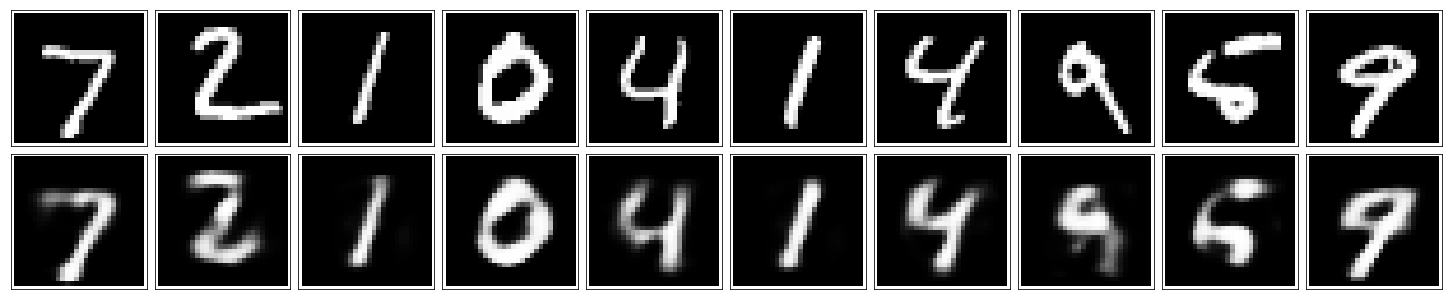

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [23]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.